Question1

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv('Olympics_dataset1.csv',skiprows =1,thousands=',')
df2 = pd.read_csv('Olympics_dataset2.csv',skiprows =1,thousands=',')
df1.columns = ['Country','summer_rubbish','summer_participation','summer_gold','summer_silver','summer_bronze','summer_total']
to_drop = ['Number of Games the country participated in.1',
             'Gold.1',
             'Silver.1',
             'Bronze.1',
             'Total.1']
df2.drop(to_drop,inplace=True,axis=1)
df2.columns = ['Country','winter_ participation','winter_gold','winter_silver','winter_bronze','winter_total']
df3 = pd.merge(df1,df2,on='Country')
df3=df3.drop(df3.tail(1).index)
print(df3.head(5).to_string())

                    Country summer_rubbish  summer_participation  summer_gold  summer_silver  summer_bronze  summer_total  winter_ participation  winter_gold  winter_silver  winter_bronze  winter_total
0         Afghanistan (AFG)            BLA                  14.0          0.0            0.0            2.0           2.0                    0.0          0.0            0.0            0.0           0.0
1             Algeria (ALG)            BLA                  13.0          5.0            4.0            8.0          17.0                    3.0          0.0            0.0            0.0           0.0
2           Argentina (ARG)            BLA                  24.0         21.0           25.0           28.0          74.0                   19.0          0.0            0.0            0.0           0.0
3             Armenia (ARM)            BLA                   6.0          2.0            6.0            6.0          14.0                    7.0          0.0            0.0            0.0     

Question2

In [382]:
df3['Country']=df3['Country'].str.extract(r'(\w.*(?=\())')
df3['Country']=df3['Country'].str.strip()
df3 = df3.set_index(['Country'])
drop_columns=['summer_rubbish',
              'summer_total',
              'winter_total']
              

df3.drop(drop_columns,inplace=True,axis=1)
df3.head(5)
#L=list(df3.index.values)
#L

,summer_participation,summer_gold,summer_silver,summer_bronze,winter_ participation,winter_gold,winter_silver,winter_bronze
Country,,,,,,,,
Afghanistan,14.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Algeria,13.0,5.0,4.0,8.0,3.0,0.0,0.0,0.0
Argentina,24.0,21.0,25.0,28.0,19.0,0.0,0.0,0.0
Armenia,6.0,2.0,6.0,6.0,7.0,0.0,0.0,0.0
Australasia,2.0,3.0,4.0,5.0,0.0,0.0,0.0,0.0


Question3

In [383]:
df3 = df3.dropna()
df3.tail(10)

,summer_participation,summer_gold,summer_silver,summer_bronze,winter_ participation,winter_gold,winter_silver,winter_bronze
Country,,,,,,,,
Vietnam,15.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
Virgin Islands,12.0,0.0,1.0,0.0,7.0,0.0,0.0,0.0
Yugoslavia,18.0,28.0,31.0,31.0,16.0,0.0,3.0,1.0
Zambia,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
Zimbabwe,13.0,3.0,4.0,1.0,1.0,0.0,0.0,0.0
Unified Team,1.0,45.0,38.0,29.0,1.0,9.0,6.0,8.0
Independent Olympic Athletes,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
Independent Olympic Participants,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0
Olympic Athletes from Russia,0.0,0.0,0.0,0.0,1.0,2.0,6.0,9.0


In [384]:
max_gold_nb = df3['summer_gold'].max()
max_gold_country_list=df3[df3.summer_gold==max_gold_nb].index.to_list()
' '.join(max_gold_country_list)

'United States'

Question5

In [385]:
df3['gold_difference'] = abs(df3.summer_gold-df3.winter_gold)
max_gold_difference=df3['gold_difference'].max()
biggest_gold_difference_country_list=df3[df3.gold_difference==max_gold_difference].index.to_list()
' '.join(biggest_gold_difference_country_list)

'United States'

In [386]:
df3['total_of_medals']= df3[['summer_gold','summer_silver','summer_bronze','winter_gold','winter_silver','winter_bronze']].sum(axis=1)
df3 = df3.sort_values(by='total_of_medals',ascending=False)
df3

,summer_participation,summer_gold,summer_silver,summer_bronze,winter_ participation,winter_gold,winter_silver,winter_bronze,gold_difference,total_of_medals
Country,,,,,,,,,,
United States,27.0,1022.0,795.0,705.0,23.0,105.0,110.0,90.0,917.0,2827.0
Soviet Union,9.0,395.0,319.0,296.0,9.0,78.0,57.0,59.0,317.0,1204.0
Great Britain,28.0,263.0,295.0,291.0,23.0,11.0,4.0,16.0,252.0,880.0
Germany,16.0,191.0,194.0,230.0,12.0,92.0,88.0,60.0,99.0,855.0
France,28.0,212.0,241.0,263.0,23.0,36.0,35.0,53.0,176.0,840.0
...,...,...,...,...,...,...,...,...,...,...
Jordan,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Djibouti,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Cyprus,10.0,0.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,1.0


Question7

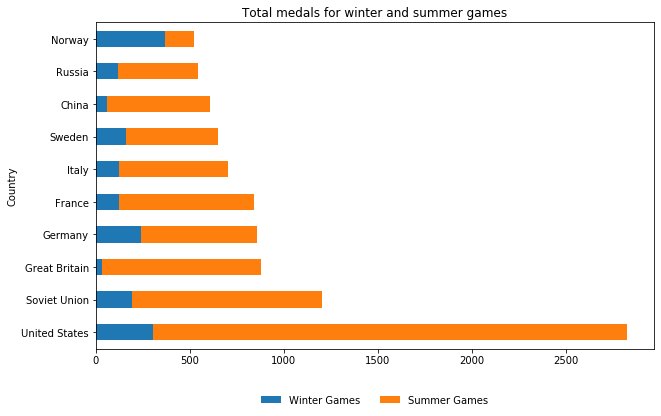

In [390]:
import matplotlib.pyplot as plt
df3['summer_medals']= df3[['summer_gold','summer_silver','summer_bronze']].sum(axis=1)
df3['winter_medals']= df3[['winter_gold','winter_silver','winter_bronze']].sum(axis=1)
top_10_df = df3.head(10)
top_10_df

q7=pd.DataFrame({'Winter Games':top_10_df['winter_medals'],'Summer Games':top_10_df['summer_medals']})
ax=q7.plot.barh(stacked=True,figsize=(10,6))
ax.legend(loc='lower center',bbox_to_anchor=(0.5,-0.2),ncol=2,frameon=False)
plt.title('Total medals for winter and summer games' )
plt.show()

#ax=q7.plot.barh(title="Total medals for winter and summer games",figsize=(8,5),legend=True,fontsize=9,stacked=True)
#ax.legend(loc='lower center',bbox_to_anchor=(0.45,-0.2),ncol=2,frameon=False)
#plt.show()

Question8

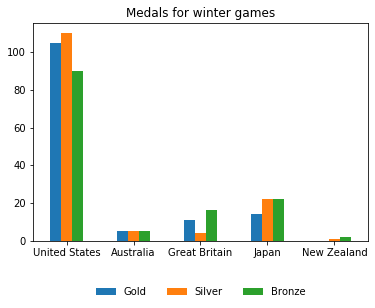

In [388]:
q8=df3.loc[['United States','Australia','Great Britain','Japan','New Zealand'],:]
q8_bar=pd.DataFrame({'Gold':q8['winter_gold'],'Silver':q8['winter_silver'],'Bronze':q8['winter_bronze']})
q8_bar
ax = q8_bar.plot.bar(rot=0)
ax.set_xlabel('')
ax.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=3,frameon=False)
plt.title('Medals for winter games' )
plt.show()
#6q8_df

Question9

In [375]:
df3['points_per_participation'] = df3.apply(lambda x: (x['summer_gold']*5 +x['summer_silver']*3+x['summer_bronze'])/x['summer_participation'] if x['summer_participation'] != 0 else 0, axis=1)
df3 = df3.sort_values(by='points_per_participation', ascending=False)
df3.head(5)


,summer_participation,summer_gold,summer_silver,summer_bronze,winter_ participation,winter_gold,winter_silver,winter_bronze,points_per_participation
Country,,,,,,,,,
Unified Team,1.0,45.0,38.0,29.0,1.0,9.0,6.0,8.0,368.000000
Soviet Union,9.0,395.0,319.0,296.0,9.0,78.0,57.0,59.0,358.666667
United States,27.0,1022.0,795.0,705.0,23.0,105.0,110.0,90.0,303.703704
East Germany,5.0,153.0,129.0,127.0,6.0,39.0,36.0,35.0,255.800000
Russia,6.0,149.0,124.0,153.0,6.0,47.0,38.0,35.0,211.666667


Question10